PROBLEM STATEMENT:
As a reminder, our goal is to look at transcripts of various comedians and note their similarities and differences.

# DATA COLLECTION:

In [18]:
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="elementor-widget-theme-post-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'https://scrapsfromtheloft.com/2021/06/28/tom-papa-youre-doing-great-transcript/',
        'https://scrapsfromtheloft.com/2021/06/01/bo-burnham-inside-transcript/',
        'https://scrapsfromtheloft.com/2021/03/27/nate-bargatze-greatest-average-american-transcript/',
        'https://scrapsfromtheloft.com/2021/02/27/brian-regan-on-the-rocks-transcript/',
        'https://scrapsfromtheloft.com/2020/11/18/kevin-hart-zero-fks-given-2020-transcript/',
        'https://scrapsfromtheloft.com/2020/12/22/sarah-cooper-everythings-fine-transcript/',
        'https://scrapsfromtheloft.com/2018/05/15/ali-wong-hard-knock-wife-full-transcript/',
        'https://scrapsfromtheloft.com/2020/11/06/chris-rock-snl-monologue-2020-transcript/'
        ]

# Comedian names
comedians = ['dave_chappelle', 'ricky_gervais', 'tom_papa', 'bo_burnham', 'nate_bargatze', 'brian_regan', 'kevin_hart', 'sarah_cooper', 'ali_wong', 'chris_rock']

In [19]:
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
https://scrapsfromtheloft.com/2021/06/28/tom-papa-youre-doing-great-transcript/
https://scrapsfromtheloft.com/2021/06/01/bo-burnham-inside-transcript/
https://scrapsfromtheloft.com/2021/03/27/nate-bargatze-greatest-average-american-transcript/
https://scrapsfromtheloft.com/2021/02/27/brian-regan-on-the-rocks-transcript/
https://scrapsfromtheloft.com/2020/11/18/kevin-hart-zero-fks-given-2020-transcript/
https://scrapsfromtheloft.com/2020/12/22/sarah-cooper-everythings-fine-transcript/
https://scrapsfromtheloft.com/2018/05/15/ali-wong-hard-knock-wife-full-transcript/
https://scrapsfromtheloft.com/2020/11/06/chris-rock-snl-monologue-2020-transcript/


In [20]:
# Pickle files for later use

# Make a new directory to hold the text files
# store transcripts for specific commedian in file corresponding to name

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [21]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

# Data cleaning.

In [24]:
 # We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [25]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [48]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

In [29]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [49]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
 

In [31]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [50]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

## Data Organisation.

In [51]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong','Bo Burnham','Brian Regan','Chris Rock','Dave Chappelle','Kevin Hart','Nate Bargatze','Ricky Gervais','Sarah Cooper','Tom Papa']

data_df['full_name'] = full_names
data_df

### document-term matrix

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aaah,aah,abandoned,ability,abject,able,aboard,abortions,absolutely,absolve,...,zillionaire,zip,zo,zombies,zone,zones,zoo,zoom,zoomers,zuckerberg
ali_wong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
bo_burnham,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
brian_regan,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,3,1,0,0,0,0
chris_rock,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave_chappelle,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
kevin_hart,0,3,0,0,0,2,0,0,2,0,...,0,0,1,1,1,0,0,0,0,0
nate_bargatze,0,0,0,0,0,4,0,0,3,0,...,1,0,0,0,0,0,1,1,0,0
ricky_gervais,0,0,0,1,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
sarah_cooper,0,0,1,0,0,3,0,0,4,0,...,0,0,0,0,0,0,1,1,0,0
tom_papa,1,0,0,0,0,2,1,0,0,0,...,0,4,0,0,0,0,1,0,0,0


In [36]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [37]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Exploratory Data Analysis

### Most Common Words

#### Analysis

In [39]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('pickle/dtm.pkl')
data = data.transpose()
data.head()

,ali_wong,bo_burnham,brian_regan,chris_rock,dave_chappelle,kevin_hart,nate_bargatze,ricky_gervais,sarah_cooper,tom_papa
aaah,0,0,0,0,1,0,0,0,0,1
aah,0,0,0,0,0,3,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,1,0
ability,0,0,0,0,0,0,0,1,0,0
abject,0,0,0,0,0,0,0,1,0,0


In [40]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali_wong': [('like', 97),
  ('just', 36),
  ('baby', 34),
  ('dont', 32),
  ('im', 28),
  ('know', 28),
  ('shit', 27),
  ('oh', 23),
  ('come', 20),
  ('okay', 18),
  ('got', 18),
  ('yeah', 17),
  ('thats', 17),
  ('husband', 16),
  ('fuck', 16),
  ('people', 15),
  ('ali', 15),
  ('pussy', 14),
  ('day', 14),
  ('mom', 13),
  ('did', 13),
  ('man', 12),
  ('lot', 12),
  ('look', 12),
  ('dick', 12),
  ('time', 12),
  ('think', 12),
  ('right', 12),
  ('youre', 11),
  ('work', 11)],
 'bo_burnham': [('im', 94),
  ('um', 56),
  ('like', 50),
  ('just', 48),
  ('white', 42),
  ('dont', 42),
  ('yeah', 41),
  ('know', 38),
  ('time', 34),
  ('world', 34),
  ('feeling', 34),
  ('gonna', 28),
  ('say', 27),
  ('thats', 26),
  ('uh', 26),
  ('shit', 26),
  ('turning', 24),
  ('day', 23),
  ('ive', 22),
  ('right', 22),
  ('funny', 21),
  ('look', 21),
  ('eyes', 20),
  ('tell', 20),
  ('youre', 20),
  ('oh', 20),
  ('got', 19),
  ('fucking', 19),
  ('really', 19),
  ('ill', 18)],
 'brian_

In [41]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali_wong
like, just, baby, dont, im, know, shit, oh, come, okay, got, yeah, thats, husband
---
bo_burnham
im, um, like, just, white, dont, yeah, know, time, world, feeling, gonna, say, thats
---
brian_regan
dont, like, im, know, just, crime, going, want, got, said, time, youre, thank, people
---
chris_rock
like, got, know, weve, president, right, okay, mean, man, people, trump, thats, government, want
---
dave_chappelle
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---
kevin_hart
im, dont, fcking, said, got, know, thats, fck, like, man, just, right, gonna, shit
---
nate_bargatze
like, just, know, im, dont, thats, goes, mean, right, youre, hes, got, think, doing
---
ricky_gervais
right, like, just, im, dont, know, said, yeah, fucking, got, say, youre, went, id
---
sarah_cooper
im, sarah, just, like, oh, cooper, nice, okay, yeah, youre, great, gonna, know, good
---
tom_papa
like, youre, dont, know, im, got, just, going, thats, want, good, yeah, r

##### Note

Some of the of the most commonly used words have little or no meaning and could be added to a stop words list.

In [42]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'just',
 'baby',
 'dont',
 'im',
 'know',
 'shit',
 'oh',
 'come',
 'okay',
 'got',
 'yeah',
 'thats',
 'husband',
 'fuck',
 'people',
 'ali',
 'pussy',
 'day',
 'mom',
 'did',
 'man',
 'lot',
 'look',
 'dick',
 'time',
 'think',
 'right',
 'youre',
 'work',
 'im',
 'um',
 'like',
 'just',
 'white',
 'dont',
 'yeah',
 'know',
 'time',
 'world',
 'feeling',
 'gonna',
 'say',
 'thats',
 'uh',
 'shit',
 'turning',
 'day',
 'ive',
 'right',
 'funny',
 'look',
 'eyes',
 'tell',
 'youre',
 'oh',
 'got',
 'fucking',
 'really',
 'ill',
 'dont',
 'like',
 'im',
 'know',
 'just',
 'crime',
 'going',
 'want',
 'got',
 'said',
 'time',
 'youre',
 'thank',
 'people',
 'thats',
 'say',
 'oh',
 'think',
 'ticket',
 'uh',
 'come',
 'little',
 'make',
 'hey',
 'does',
 'way',
 'stuff',
 'look',
 'mushrooms',
 'ive',
 'like',
 'got',
 'know',
 'weve',
 'president',
 'right',
 'okay',
 'mean',
 'man',
 'people',
 'trump',
 'thats',
 'government',
 'want',
 'tuesday',
 'going',
 'work',
 'hes',


In [43]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 10),
 ('just', 10),
 ('know', 10),
 ('got', 10),
 ('thats', 10),
 ('dont', 9),
 ('im', 9),
 ('right', 9),
 ('people', 8),
 ('time', 8),
 ('yeah', 7),
 ('youre', 7),
 ('oh', 6),
 ('going', 6),
 ('day', 5),
 ('didnt', 5),
 ('good', 5),
 ('shit', 4),
 ('come', 4),
 ('man', 4),
 ('look', 4),
 ('think', 4),
 ('gonna', 4),
 ('ive', 4),
 ('want', 4),
 ('said', 4),
 ('little', 4),
 ('hes', 4),
 ('okay', 3),
 ('did', 3),
 ('work', 3),
 ('say', 3),
 ('uh', 3),
 ('fucking', 3),
 ('thank', 3),
 ('doing', 3),
 ('theyre', 3),
 ('fuck', 2),
 ('lot', 2),
 ('president', 2),
 ('mean', 2),
 ('need', 2),
 ('thing', 2),
 ('went', 2),
 ('theres', 2),
 ('great', 2),
 ('baby', 1),
 ('husband', 1),
 ('ali', 1),
 ('pussy', 1),
 ('mom', 1),
 ('dick', 1),
 ('um', 1),
 ('white', 1),
 ('world', 1),
 ('feeling', 1),
 ('turning', 1),
 ('funny', 1),
 ('eyes', 1),
 ('tell', 1),
 ('really', 1),
 ('ill', 1),
 ('crime', 1),
 ('ticket', 1),
 ('make', 1),
 ('hey', 1),
 ('does', 1),
 ('way', 1),
 ('stuff', 1),
 ('m

In [44]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'just',
 'know',
 'got',
 'thats',
 'dont',
 'im',
 'right',
 'people',
 'time',
 'yeah',
 'youre']

In [46]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('pickle/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [47]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

ModuleNotFoundError: No module named 'wordcloud'

In [54]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

NameError: name 'wc' is not defined

#### Findings.

A lot of the comedians use the F-word. The s-word is also used quite alot. This is clear from our word cloud.

### Number of unique words for every comedian

In [55]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
3,Bo Burnham,257
2,Bill Burr,1120
6,Jim Jefferies,1189
8,John Mulaney,1233
1,Anthony Jeselnik,1248
5,Hasan Minhaj,1330
9,Louis C.K.,1375
4,Dave Chappelle,1385
0,Ali Wong,1448
7,Joe Rogan,1633


In [57]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
3,Bo Burnham,257,526,60,8.766667
2,Bill Burr,1120,2567,80,32.087500
0,Ali Wong,1448,2878,60,47.966667
8,John Mulaney,1233,3210,62,51.774194
4,Dave Chappelle,1385,4065,67,60.671642
6,Jim Jefferies,1189,4704,77,61.090909
1,Anthony Jeselnik,1248,3662,59,62.067797
9,Louis C.K.,1375,3932,58,67.793103
5,Hasan Minhaj,1330,5248,73,71.890411
7,Joe Rogan,1633,4972,63,78.920635


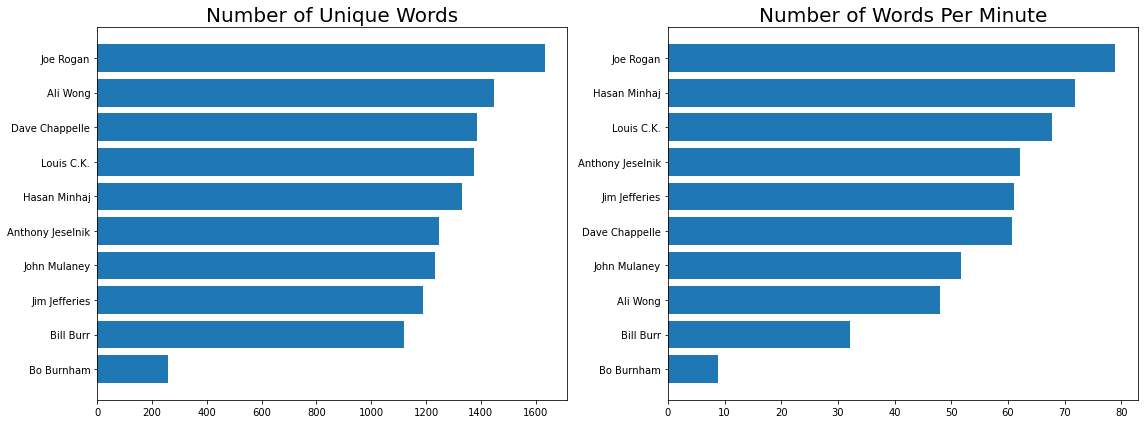

In [58]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

#### vocabulary.

Joe Rogan and Ali wong use alot of vocabulary hence the number of unique words in their transcripts.

Bo Burnham and Bill Burr have a smaller vocabulary.

#### Talking Speed

Hasan Minhaj and Joe Rogan talk fast while Bo Burnham and Bill Burr talk slow.

## Amount of Profanity.

In [59]:
Counter(words).most_common()

[('like', 10),
 ('just', 10),
 ('know', 10),
 ('got', 10),
 ('thats', 10),
 ('dont', 9),
 ('im', 9),
 ('right', 9),
 ('people', 8),
 ('time', 8),
 ('yeah', 7),
 ('youre', 7),
 ('oh', 6),
 ('going', 6),
 ('day', 5),
 ('didnt', 5),
 ('good', 5),
 ('shit', 4),
 ('come', 4),
 ('man', 4),
 ('look', 4),
 ('think', 4),
 ('gonna', 4),
 ('ive', 4),
 ('want', 4),
 ('said', 4),
 ('little', 4),
 ('hes', 4),
 ('okay', 3),
 ('did', 3),
 ('work', 3),
 ('say', 3),
 ('uh', 3),
 ('fucking', 3),
 ('thank', 3),
 ('doing', 3),
 ('theyre', 3),
 ('fuck', 2),
 ('lot', 2),
 ('president', 2),
 ('mean', 2),
 ('need', 2),
 ('thing', 2),
 ('went', 2),
 ('theres', 2),
 ('great', 2),
 ('baby', 1),
 ('husband', 1),
 ('ali', 1),
 ('pussy', 1),
 ('mom', 1),
 ('dick', 1),
 ('um', 1),
 ('white', 1),
 ('world', 1),
 ('feeling', 1),
 ('turning', 1),
 ('funny', 1),
 ('eyes', 1),
 ('tell', 1),
 ('really', 1),
 ('ill', 1),
 ('crime', 1),
 ('ticket', 1),
 ('make', 1),
 ('hey', 1),
 ('does', 1),
 ('way', 1),
 ('stuff', 1),
 ('m

In [60]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali_wong,19,27
bo_burnham,32,26
brian_regan,0,0
chris_rock,0,0
dave_chappelle,65,46
kevin_hart,0,46
nate_bargatze,0,0
ricky_gervais,60,6
sarah_cooper,1,4
tom_papa,0,3


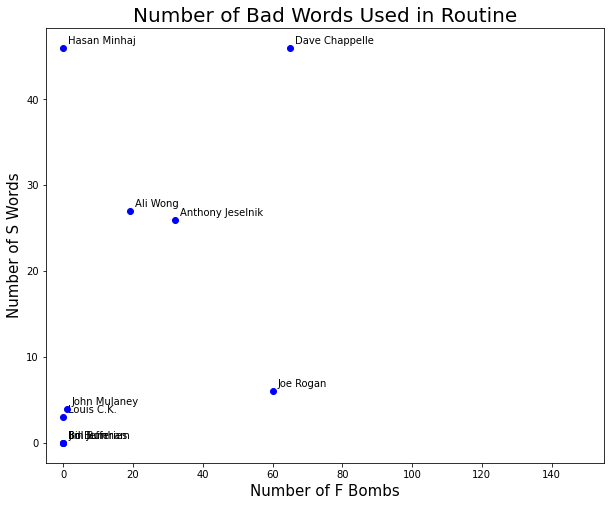

In [61]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

dave_chappelle uses the most profound words in his script while nate_bargatze uses the least.